In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
import datetime
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


In [2]:
!pip install opencv-python

In [3]:
!pip install opencv-contrib-python

In [4]:
!pip install deepface

In [5]:
!pip install tf-keras

In [6]:
import cv2 
from deepface import DeepFace

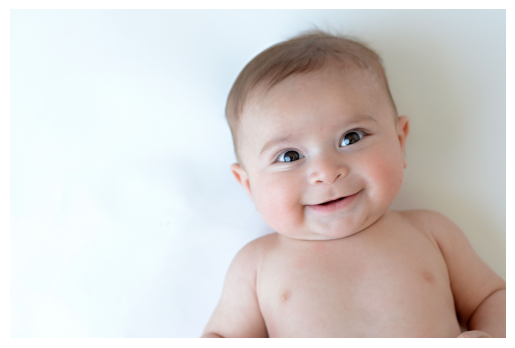

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request

url = 'https://th.bing.com/th/id/R.50365ddd1fdbd64e0756b61d7f27c9dc?rik=Ho17t5tV%2fDQp0g&pid=ImgRaw&r=0'
with urllib.request.urlopen(url) as response:
    img = np.array(Image.open(response))

plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
from deepface import DeepFace

predictions = DeepFace.analyze(img, actions=['emotion'])
print(predictions)

[{'emotion': {'angry': 1.0369768061367504, 'disgust': 3.092738363097144e-07, 'fear': 97.02143108589279, 'happy': 0.9443202792918349, 'sad': 0.011885828318646154, 'surprise': 0.948898660522859, 'neutral': 0.036482284502375485}, 'dominant_emotion': 'fear', 'region': {'x': 2098, 'y': 621, 'w': 1956, 'h': 1956, 'left_eye': (3383, 1286), 'right_eye': (2757, 1470)}, 'face_confidence': 0.95}]


In [9]:
# Assuming predictions is a list of dictionaries
dominant_emotion = predictions[0]['dominant_emotion']
print(dominant_emotion)

fear


In [10]:
# Correctly concatenate the paths
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [11]:
cv2.CascadeClassifier

cv2.CascadeClassifier

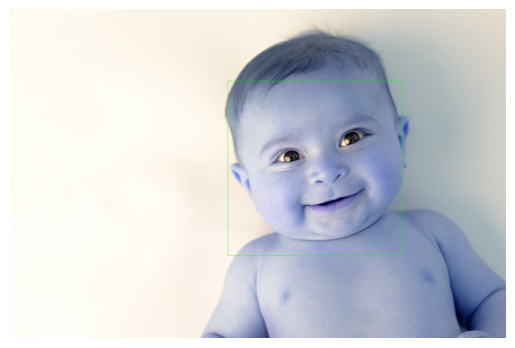

In [12]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = facecascade.detectMultiScale(gray, 1.1, 4)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image with detected faces
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

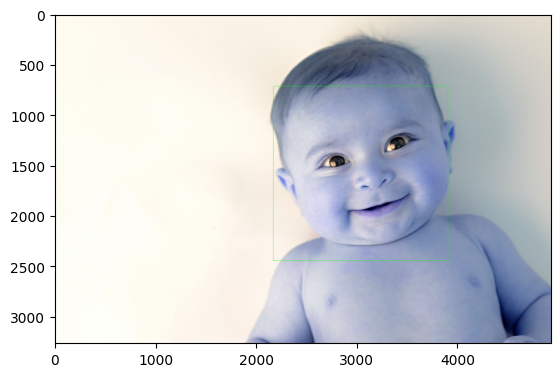

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Use putText() method for inserting text on video
cv2.putText(img,
            predictions[0]['dominant_emotion'],  # Access the first element of the list
            (50, 50),
            font, 1,
            (250, 255, 255),
            2,
            cv2.LINE_4)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


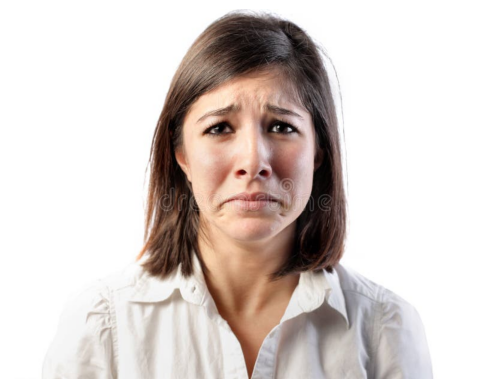

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request

url = 'https://thumbs.dreamstime.com/b/sadness-17806430.jpg'
with urllib.request.urlopen(url) as response:
    img = np.array(Image.open(response))

plt.imshow(img)
plt.axis('off')
plt.show()

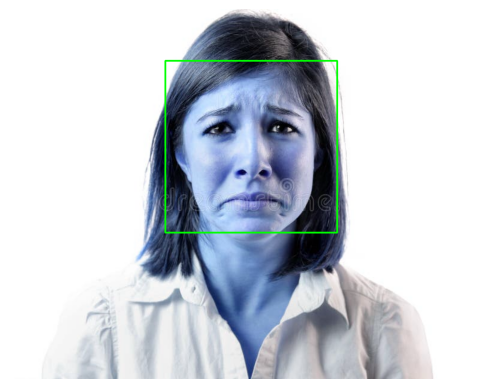

In [15]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = facecascade.detectMultiScale(gray, 1.1, 4)

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the image with detected faces
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

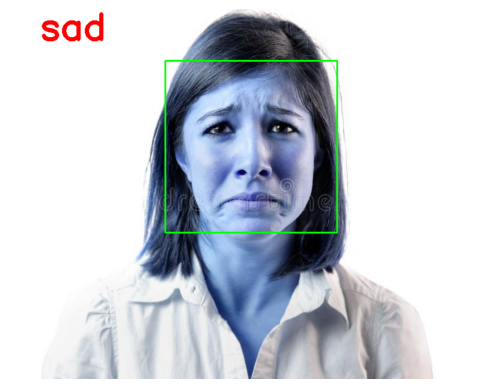

In [16]:
predictions = DeepFace.analyze(img, actions=['emotion'])

# Define the font and increase the font size
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 2  # Increase the font size
color = (0, 0, 255)  # Text color in BGR
thickness = 5  # Thickness of the text

# Use putText() method for inserting text on video
cv2.putText(img,
            predictions[0]['dominant_emotion'],  # Access the first element of the list
            (50, 50),
            font, fontScale,
            color,
            thickness,
            cv2.LINE_4)

# Display the image with the text
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [17]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        break
    imgrgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = DeepFace.analyze(imgrgb, actions=['emotion'], enforce_detection=False)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        dominant_emotion = result[0]['dominant_emotion']
        cv2.putText(frame, dominant_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow('Demo video', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

